# Bigram Language Model - Neural Network Version

In [35]:
# First, we need to install PyTorch if we haven't already.
#!pip install torch   #

In [36]:
# Imports
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# Opening the file containing all the domain names.
dataset = open('../data/domain_names_full.txt', 'r').read().splitlines()
# Let's peek at the first few items.
dataset[:8]

['google.com',
 'a-msedge.net',
 'microsoft.com',
 'facebook.com',
 'amazonaws.com',
 'googleapis.com',
 'apple.com',
 'youtube.com']

In [38]:
# How many domains are we working with?
len(dataset)

4345850

In [39]:
# Checking unique characters in the first 3 domains as a test.
sorted(list(set([y for x in dataset[:3] for y in x])))

['-',
 '.',
 'a',
 'c',
 'd',
 'e',
 'f',
 'g',
 'i',
 'l',
 'm',
 'n',
 'o',
 'r',
 's',
 't']

In [40]:
# We'll use '*' as our special start/end token.
charset = ['*'] + sorted(list(set([y for x in dataset for y in x])))

# Character-to-index and index-to-character mappings.
ctoi = {c:i for i, c in enumerate(charset)}
itoc = {i:c for i, c in enumerate(charset)}

In [41]:
print(charset)

['*', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


Now we need to build a dataset that a neural network can actually read. 
We'll convert our bigrams into input-output pairs $(x, y)$.

In [42]:
xs, ys = [], []

for d in dataset[2:3]:
    example = ['*'] + list(d) + ['*']
    for c1, c2 in zip(example, example[1:]):
        xs.append(ctoi[c1])
        ys.append(ctoi[c2])
        print(c1, c2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

* m
m i
i c
c r
r o
o s
s o
o f
f t
t .
. c
c o
o m
m *


In [43]:
# These are the integer indices for the input characters.
xs

tensor([ 0, 26, 22, 16, 31, 28, 32, 28, 19, 33,  2, 16, 28, 26])

In [44]:
# These are the labels (the indices of the characters that should follow).
ys

tensor([26, 22, 16, 31, 28, 32, 28, 19, 33,  2, 16, 28, 26,  0])

In [45]:
# We'll use one-hot encoding to represent each character.
F.one_hot(xs, num_classes=len(charset)).float().shape

torch.Size([14, 40])

In [46]:
nclasses = len(charset)
xenc = F.one_hot(xs, num_classes=nclasses).float()

In [47]:
xenc.shape

torch.Size([14, 40])

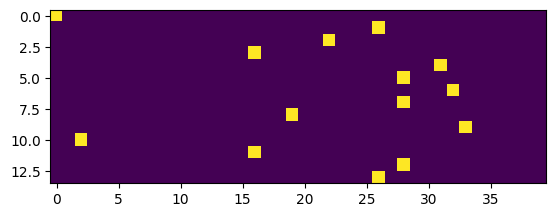

In [48]:
#View
plt.imshow(xenc)

# Our "Neural Network"

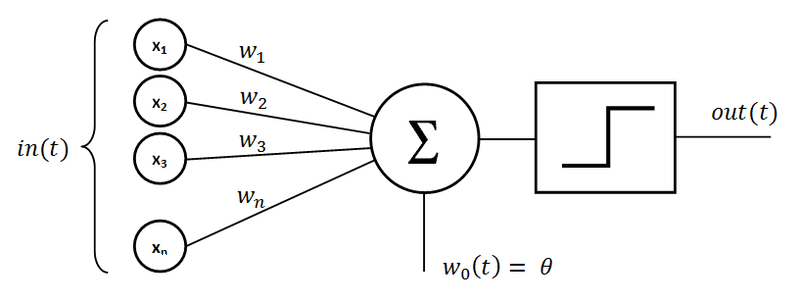



We are building a network with a single linear layer, no bias. 
It's basically just a matrix multiplication: $Y = X \cdot W$.

In [49]:
#W initialization
W = torch.randn((nclasses, nclasses))
W

tensor([[-1.2847, -1.0437,  0.1937,  ..., -0.7212, -0.1451,  0.0606],
        [-0.4701, -0.3113, -0.2685,  ..., -0.5248, -2.2416,  0.5736],
        [-1.4969, -0.8986,  0.1605,  ..., -0.4330,  1.2851,  1.7358],
        ...,
        [ 0.7709, -0.3491,  0.3871,  ..., -0.6847,  0.7860,  0.9719],
        [ 0.4760, -0.7594, -2.4877,  ..., -1.9401, -0.1737, -0.5179],
        [-0.4387, -0.0823,  1.0077,  ...,  0.4227, -0.3072, -1.1806]])

In [50]:
#Shape test
(xenc @ W).shape# [11 x 40] @ [40 x 1] ==> [11 x 1]

torch.Size([14, 40])

In [51]:
#Shape test
W = torch.randn((nclasses, nclasses))
xenc @ W  # [11 x 40] @ [40 x 40] ==> [11 x 40]

tensor([[-3.6592e-01, -3.2982e-01, -9.9355e-01, -1.5545e+00, -1.1022e+00,
         -1.6924e+00, -1.5263e+00, -3.5136e-01, -1.0458e+00, -1.2102e+00,
          2.3506e-01, -6.9643e-01,  2.4461e-01, -8.0099e-01,  2.1107e+00,
          9.8858e-02,  7.7310e-02, -1.0038e+00, -3.8078e-01,  1.1807e+00,
         -3.7652e-01, -2.2818e+00,  1.6673e+00, -8.0557e-01, -4.4013e-01,
         -4.9489e-01,  9.5997e-01,  7.8699e-01, -5.4148e-01, -2.5170e+00,
         -7.5089e-01, -3.9363e-01,  7.2555e-01,  1.0897e-01, -1.2076e+00,
          5.0552e-01, -4.6746e-01,  2.1724e+00, -5.9630e-02, -9.4543e-01],
        [ 5.3461e-01, -9.3164e-01,  1.2920e+00,  6.4357e-01, -2.1688e-01,
         -1.1149e+00, -1.6578e+00, -7.8928e-01, -1.7739e+00,  5.1256e-01,
         -1.1963e+00,  4.9451e-01, -2.3819e-01, -7.5841e-01,  7.8359e-01,
          1.0146e+00,  3.0284e-01,  1.1411e+00,  2.9667e-01, -5.8393e-01,
         -1.3533e+00, -7.7005e-01, -2.7391e+00,  1.6273e+00,  1.4560e+00,
         -1.7143e-01,  1.5244e+00, -9

In [52]:
# Raw output for the first character.
(xenc @ W)[0]

tensor([-0.3659, -0.3298, -0.9936, -1.5545, -1.1022, -1.6924, -1.5263, -0.3514,
        -1.0458, -1.2102,  0.2351, -0.6964,  0.2446, -0.8010,  2.1107,  0.0989,
         0.0773, -1.0038, -0.3808,  1.1807, -0.3765, -2.2818,  1.6673, -0.8056,
        -0.4401, -0.4949,  0.9600,  0.7870, -0.5415, -2.5170, -0.7509, -0.3936,
         0.7255,  0.1090, -1.2076,  0.5055, -0.4675,  2.1724, -0.0596, -0.9454])

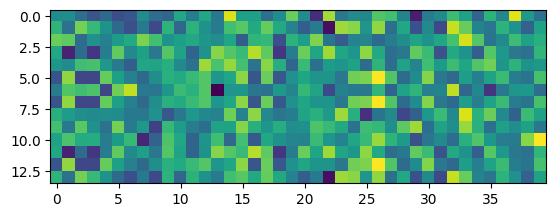

In [53]:
plt.imshow(xenc @ W)

The numbers above aren't probabilities yet:
- They aren't between 0 and 1.
- They can be negative.

We treat these as **logits** (log-counts). To get something like probabilities:
1. Exponentiate them: $e^{\text{logits}}$ (makes everything positive).
2. Normalize them: $\frac{e^{\text{logits}}}{\sum e^{\text{logits}}}$ (makes everything sum to 1).

In [54]:
#logits to probs
logits = xenc @ W  
counts = logits.exp()
probs = counts/counts.sum(axis=1, keepdims=True)

In [55]:
probs[0]

tensor([0.0132, 0.0137, 0.0070, 0.0040, 0.0063, 0.0035, 0.0041, 0.0134, 0.0067,
        0.0057, 0.0241, 0.0095, 0.0243, 0.0085, 0.1569, 0.0210, 0.0205, 0.0070,
        0.0130, 0.0619, 0.0130, 0.0019, 0.1007, 0.0085, 0.0122, 0.0116, 0.0497,
        0.0418, 0.0111, 0.0015, 0.0090, 0.0128, 0.0393, 0.0212, 0.0057, 0.0315,
        0.0119, 0.1669, 0.0179, 0.0074])

## Putting It All Together

In [56]:
xs

tensor([ 0, 26, 22, 16, 31, 28, 32, 28, 19, 33,  2, 16, 28, 26])

In [57]:
ys

tensor([26, 22, 16, 31, 28, 32, 28, 19, 33,  2, 16, 28, 26,  0])

In [58]:
g = torch.Generator().manual_seed(42)
W = torch.randn((nclasses, nclasses), generator=g, requires_grad=True)

In [59]:
# forward pass
# 1. One-hot encode inputs
xenc = F.one_hot(xs, num_classes=nclasses).float() 

# 2. Predict log-counts (logits)
logits = xenc @ W 

# 3. Exponentiate to get counts
counts = logits.exp() 

# 4. Normalize to get probabilities
probs = counts / counts.sum(axis=1, keepdims=True)

In [60]:
probs[0, 20], probs[1,28], probs[2,28], probs[3,20], probs[4, 25] # and so on...
probs[range(14), ys]

tensor([0.0244, 0.0645, 0.0074, 0.0034, 0.0400, 0.0023, 0.0175, 0.0164, 0.0177,
        0.0097, 0.0015, 0.0108, 0.0170, 0.0106], grad_fn=<IndexBackward0>)

In [61]:
# Our loss function is the Negative Log Likelihood.
loss = -probs[range(14), ys].log().mean()
loss # .item() 4.478

tensor(4.4857, grad_fn=<NegBackward0>)

In [62]:
# backwards pass
W.grad = None
loss.backward()  # <-- requiere que trackear los gradientes en W

In [63]:
W.grad

tensor([[0.0065, 0.0042, 0.0023,  ..., 0.0006, 0.0013, 0.0004],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0013, 0.0009, 0.0003,  ..., 0.0014, 0.0009, 0.0022],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [64]:
# update Weights
W.data += -0.1 * W.grad

In [65]:
#Dataset creation

xs, ys = [], []

for d in dataset[:100000]:  
    example = ['*'] + list(d) + ['*']
    for c1, c2 in zip(example, example[1:]):
        xs.append(ctoi[c1])
        ys.append(ctoi[c2])
        #print(c1, c2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
nsamples = xs.nelement()  # <== needed for index probabilities

In [66]:
#Trainign loop
iterations = 100
lr = 10.
print(nsamples)
for k in range(iterations):
    # forward pass
    xenc = F.one_hot(xs,num_classes=nclasses).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(axis=1, keepdims=True)
    loss = -probs[range(nsamples), ys].log().mean() # + 0.01 * (W**2).mean()
    print(loss.item())
    
    # backwards pass
    W.grad = None
    loss.backward()
    
    #update
    W.data += -lr * W.grad

1361270
4.311142921447754
4.20893669128418
4.111654758453369
4.01911735534668
3.931607961654663
3.8496649265289307
3.773888349533081
3.7047502994537354
3.642455577850342
3.5869030952453613
3.537749767303467
3.494516611099243
3.456655263900757
3.423563241958618
3.394571542739868
3.3689768314361572
3.3460960388183594
3.325331926345825
3.306206703186035
3.288362979888916
3.271545648574829
3.2555761337280273
3.240330457687378
3.2257227897644043
3.211690902709961
3.198190927505493
3.1851892471313477
3.1726574897766113
3.160573959350586
3.148919105529785
3.1376748085021973
3.1268253326416016
3.116354465484619
3.106248617172241
3.0964925289154053
3.0870723724365234
3.077974557876587
3.0691864490509033
3.060694456100464
3.0524866580963135
3.044550895690918
3.0368754863739014
3.029449224472046
3.022261142730713
3.01530122756958
3.0085599422454834
3.0020272731781006
2.995695114135742
2.989553928375244
2.983595609664917
2.9778130054473877
2.972198486328125
2.966745138168335
2.9614458084106445
2.9

In [34]:
#Compare with Nll random init and not training
-np.log(1/40)

np.float64(3.6888794541139363)

## Inference: Using the trained weights

In [67]:
g = torch.Generator().manual_seed(42)

for i in range(10):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]),num_classes=nclasses).float()
        logits = xenc @ W
        counts = logits.exp()
        probs = counts / counts.sum(axis=1, keepdims=True)
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        out.append(itoc[ix])
        if ix == 0:
            break
    print(''.join(out[:-1]))

lve6
8fdsgat
com
cobit
s.am
d.cacom
c.rgkeg5wzwzv_.com
l-pfoo
phnnblu-htinen.p-6.o1cedz5.omzqhom.i3jfobe.com
s-ly.md.cbnemm



## Exercises

* Generate a trigram model using the neural network approach (intermediate).
    * Hint: Use one-hot encoding to encode the two inputs into a single 
      80-dimensional vector, and use a model with 40 neurons (40 outputs), 


In [ ]:
#Building the new dataset
xs, ys = [], []

for d in dataset[:100000]:
    # Start with two special tokens (index 0 is '*')
    context = [0, 0] 
    for char in d + '*':
        ix = ctoi[char]
        xs.append(context) # We append a list of 2 integers
        ys.append(ix)
        # Slide the window: [c1, c2] -> [c2, c3]
        context = context[1:] + [ix]

xs = torch.tensor(xs) # This creates a 2D tensor of shape [N, 2]
ys = torch.tensor(ys)
num_samples = xs.shape[0]

print(f"Dataset ready!")
print(f"xs shape: {xs.shape}") 
print(f"ys shape: {ys.shape}")

Dataset ready!
xs shape: torch.Size([1361270, 2])
ys shape: torch.Size([1361270])


In [71]:
#Training
g = torch.Generator().manual_seed(42)
W = torch.randn((80, nclasses), generator=g, requires_grad=True)

iterations = 100
lr = 50.0 

for k in range(iterations):
    
    # 1. One-hot encode each character in the context separately
    # xs[:, 0] is the first char column, xs[:, 1] is the second
    xenc1 = F.one_hot(xs[:, 0], num_classes=nclasses).float() # [N, 40]
    xenc2 = F.one_hot(xs[:, 1], num_classes=nclasses).float() # [N, 40]
    
    # 2. Concatenate them to create an 80-dimensional input vector
    xenc = torch.cat([xenc1, xenc2], dim=1) # [N, 80]
    
    # 3. Forward pass
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(axis=1, keepdims=True)
    
    # 4. Loss calculation
    loss = -probs[range(num_samples), ys].log().mean()
    
    # 5. Backward pass
    W.grad = None
    loss.backward()
    
    # 6. Update
    W.data += -lr * W.grad
    
    if k % 10 == 0:
        print(f"Iteration {k:3d} | Loss: {loss.item():.4f}")

Iteration   0 | Loss: 4.6483
Iteration  10 | Loss: 2.8672
Iteration  20 | Loss: 2.6714
Iteration  30 | Loss: 2.5961
Iteration  40 | Loss: 2.5577
Iteration  50 | Loss: 2.5350
Iteration  60 | Loss: 2.5201
Iteration  70 | Loss: 2.5096
Iteration  80 | Loss: 2.5019
Iteration  90 | Loss: 2.4960


In [72]:
# Generating names using the 2-character context.
g = torch.Generator().manual_seed(42)

for i in range(10):
    out = []
    context = [0, 0] # Initial state is always ['*', '*']
    
    while True:
        # One-hot encode the current 2-char context
        x1 = F.one_hot(torch.tensor([context[0]]), num_classes=nclasses).float()
        x2 = F.one_hot(torch.tensor([context[1]]), num_classes=nclasses).float()
        xenc = torch.cat([x1, x2], dim=1) # Shape [1, 80]
        
        # Predict the next character
        logits = xenc @ W
        counts = logits.exp()
        probs = counts / counts.sum(axis=1, keepdims=True)
        
        # Sample from the distribution
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        
        if ix == 0: # Hit the end token
            break
            
        out.append(itoc[ix])
        # Update the context for the next step
        context = context[1:] + [ix]
        
    print(''.join(out))

lve.c8
dsgat
com
comit
siam.comackm
ch.nkeg.com.ve.com
lepfoo
phnnb.urit
etu.por.o1
ed.com
